In [5]:
#Importing all the libraries to use for the assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. A piece of paper is 1mm thick. Assuming you can fold it as many
times as you want, how many folds would it take to exceed the
height of Mount Everest at 8,848 m?

In [23]:
#For every fold, the height of the paper will double exponentially. 
#The goal here is to loop through n iterations of an exponential increment on two until we exceed 8,848,000 mm

num_folds = 0
val_height = 0
#The value of 8,848m in mm is 8848000
target_height = 8848000

while (val_height < target_height):
    val_height = 2**num_folds
    if(val_height < target_height):
        num_folds += 1
    else:
        print(num_folds)

24


2. The volume of water in a reservoir decreases at an exponential rate, following v(t) = v(0)exp(-at) with a=0.1. How much time, t, does it take for the volume to decrease to less than one half of its initial volume, v(0)?

In [24]:
#The time at which the volume will be less than half its initial value is represented by
#0.5 = e -0.1t
#Introduce ln on both sides to get the final value of t
#t = ln0.5 / -0.1

t = np.log(0.5) / -0.1
print(t)

6.931471805599452


3. If you deposit \\$100 in a bank account that offers an annualized interest rate of 5% (compounded annually), how much money will you have (round to the \\$) after one, two, three, four and five years?

In [25]:
#Here, we use the formula below to calculate the money accumulated:
#A = P(1+r/n)**nt
#Since it is accumulated once a year, our value of n is always 1

principal = 100
rate = 5/100
year = 1
while(year <= 5):
    accumulated_amount = principal * (1 + rate)**year
    year+=1
    print(round(accumulated_amount))

105
110
116
122
128


4. Suppose you want to buy a car worth \\$20,000. A financial institution can provide a loan with a monthly interest rate of 1%. What is the monthly payment to pay off the debt in one, two and three years (rounded to the nearest \\$)?

In [26]:
#Here, we use the formula below to calculate the monthly payments:
#A = rP / 1-(1+r)**-n
#Where r is the rate, P is the loan amount and n is the number of months
#the payment is to be made

loan = 20000
rate = 1/100
year = 1
while(year <= 3):
    period = 12* year*-1
    denominator = 1 - (1+rate)**period
    monthly_payment_amount = loan * rate / denominator
    year+=1
    print(round(monthly_payment_amount))

1777
941
664


5. You are about to set up a new business and will invest \\$100,000. On day one you expect to have 100 customers and the number of customers will grow at a rate of 1% per day. If each customer provides profits of \\$10, how many days will it take to repay your initial investment based on cumulated profits? Plot cumulated profits per day, show initial investment and mark breakeven day.

69.65960101789182


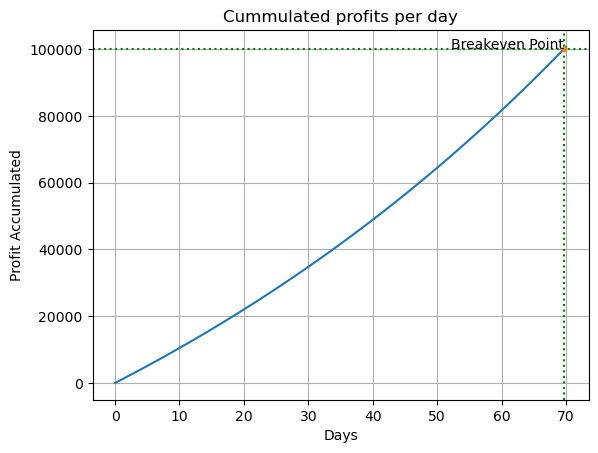

In [27]:
#The idea here is to calculate the daily profit accumulated until the figure exceeds the investment
#Add the daily profit to a list, and the days to another list
#Use matplotlib to plot the cummulated profits per day

investment = 100000
num_customers = 100
rate = 1/100
profit = 0
days = 0
customer_daily_increment = rate * num_customers
profit_list = [profit]
day_list = [days]
while(profit < investment):
    profit += num_customers * 10
    num_customers += num_customers * rate
    days += 1
    profit_list.append(profit)
    day_list.append(days)
    
breakeven_day = np.interp(investment,profit_list,day_list)
print(breakeven_day)
    
plt.title("Cummulated profits per day")
plt.xlabel("Days")
plt.ylabel("Profit Accumulated")
plt.axhline(y = investment, color = 'g', linestyle = ':')
plt.axvline(x = breakeven_day, color = 'g', linestyle = ':')
plt.plot(day_list,profit_list)
plt.plot(breakeven_day, investment,".")
plt.grid()
plt.text(breakeven_day, investment,"Breakeven Point",horizontalalignment='right')
plt.show()

6. Using data from http://bit.ly/1JJyf29 and linear interpolation, estimate the dates when the number of cases and deaths due to
Ebola exceeded 100, 500, 1000, 2000 and 5000. Graph the cases and deaths (observations and interpolations) and mark the dates when thresholds were exceeded with a circle.

In [28]:
#Load the data from the excel file
main_df = pd.read_excel('ebola.xls')
#Convert the datatype of the date column to DateTime
main_df["Date"] = pd.to_datetime(main_df["Date"])
#Create a new dataframe with the minimum and maximum dates from the main dataframe
new_dates_df = pd.DataFrame(pd.date_range(main_df["Date"].min(),main_df["Date"].max(),freq='D'),columns=["Date"])
#Merge the two dataframes
merged_ebola_df = pd.merge(new_dates_df,main_df, on="Date",how="left")
#Set the date as the new index on the new dataframe
merged_ebola_df = merged_ebola_df.set_index('Date')
#Interpolate the data on the new dataframe
merged_ebola_df = merged_ebola_df.interpolate()

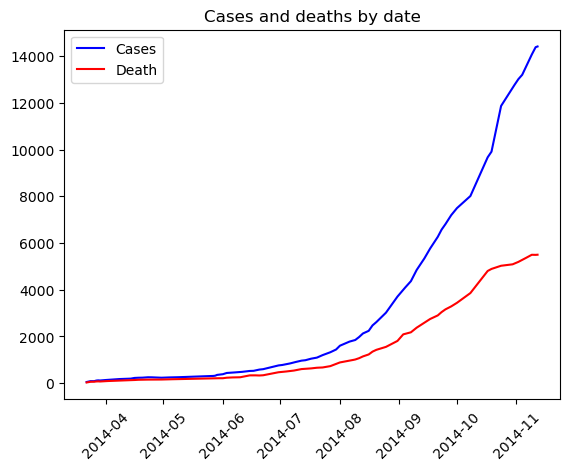

In [30]:
plt.title("Cases and deaths by date")
plt.plot(merged_ebola_df.index,merged_ebola_df["Cases"],color="b",label="Cases")
plt.plot(merged_ebola_df.index,merged_ebola_df["Death"],color="r",label="Death")
plt.xticks(rotation = 45)
plt.legend(loc=0)
plt.show()

In [32]:
num_dataset = [100,500,1000,2000,5000]
def select_indices(dataframe, col):
    index_list = []
    for num in num_dataset:
        index_list.append(dataframe.loc[dataframe[col] > num].index[0])
    return index_list

In [33]:
cases_df = pd.DataFrame(merged_ebola_df['Cases'])
cases_indices = select_indices(cases_df,"Cases")

death_df = pd.DataFrame(merged_ebola_df['Death'])
death_indices = select_indices(death_df,"Death")

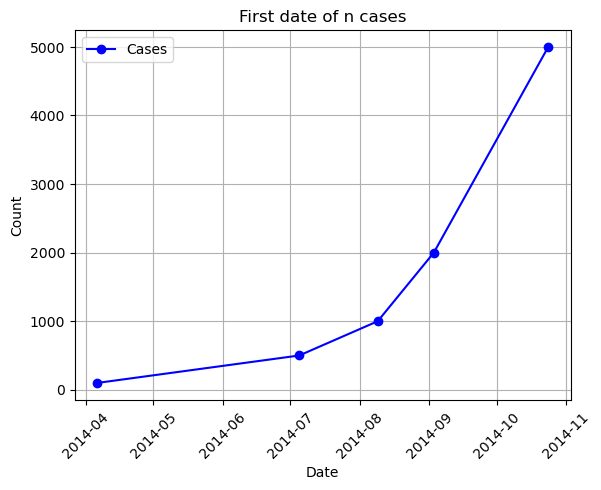

In [34]:
plt.title("First date of n cases")
plt.plot(death_indices,num_dataset,color="b",label="Cases",marker="o")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.legend()
plt.grid()
plt.show()

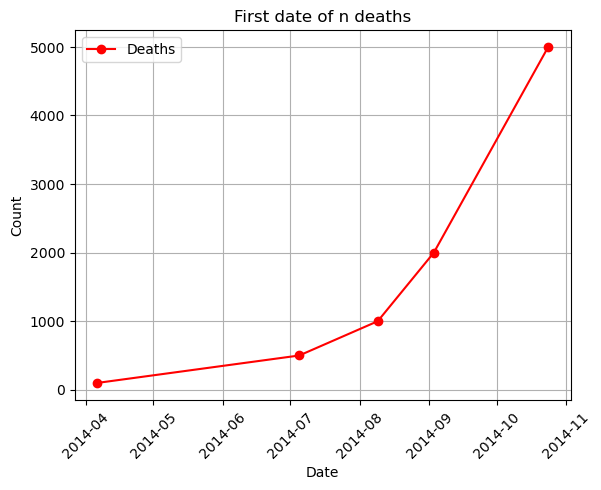

In [35]:
plt.title("First date of n deaths")
plt.plot(death_indices,num_dataset,color="r",label="Deaths",marker="o")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.legend()
plt.grid()
plt.show()

7. Using data from 2014, downloaded in the previous question, what is the average growth rate per day, as a percentage, in the number of Ebola cases and deaths?

In [36]:
df_cases_rate_change = cases_df['Cases'].pct_change()*100
print("%.2f%%" % (df_cases_rate_change.mean()))

2.51%


In [37]:
df_death_rate_change = death_df['Death'].pct_change()*100
print("%.2f%%" % (df_death_rate_change.mean()))

2.33%


8. Using the same date, plot the number of deaths versus the number of cases and estimate the average ratio of Ebola deaths to cases.

In [ ]:
plt.title("Deaths VS Cases")
plt.plot(merged_ebola_df['Cases'],merged_ebola_df['Death'])
plt.xlabel("Cases")
plt.ylabel("Deaths")
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [ ]:
merged_ebola_df['Death - Case Ratio'] = merged_ebola_df['Cases'] / merged_ebola_df['Death']
print("%.2f" % (merged_ebola_df['Death - Case Ratio'].mean()))

9. Obtain daily prices for two ETFs called ‘SPY’ and ‘TLT’ which track the S&P500 index and long-term Treasury Bond. Select the
adjusted closing prices. Plot the two time series during 01/01/2014 – 08/31/2015 and make them comparable by starting from prices of $100 on the first day in 01/01/2014 – 08/31/2015.

In [6]:
start_date = pd.to_datetime('01/01/2014')
end_date = pd.to_datetime('08/31/2015')

def normalize_row(x, index):
    return (x/index) * 100

spy_stock_data_df = pd.read_csv('SPY.csv')
spy_stock_data_df['Date'] = pd.to_datetime(spy_stock_data_df['Date'])

spy_date_compare_df = (spy_stock_data_df['Date'] >= start_date) & (spy_stock_data_df['Date'] <= end_date)
spy_date_df = spy_stock_data_df.loc[spy_date_compare_df]

spy_stock_df = spy_date_df.set_index('Date')
spy_close_df = pd.DataFrame(spy_stock_df['Adj Close'])

spy_first_index = spy_close_df.iloc[0]['Adj Close']
spy_normalized_close_df = spy_close_df['Adj Close'].apply(normalize_row, args = (spy_first_index,))

In [7]:
tlt_stock_data_df = pd.read_csv('TLT.csv')
tlt_stock_data_df['Date'] = pd.to_datetime(tlt_stock_data_df['Date'])

tlt_date_compare_df = (tlt_stock_data_df['Date'] >= start_date) & (tlt_stock_data_df['Date'] <= end_date)
tlt_date_df = tlt_stock_data_df.loc[tlt_date_compare_df]

tlt_stock_df = tlt_date_df.set_index('Date')
tlt_close_df = pd.DataFrame(tlt_stock_df['Adj Close'])

tlt_first_index = tlt_close_df.iloc[0]['Adj Close']
tlt_normalized_close_df = tlt_close_df['Adj Close'].apply(normalize_row, args = (tlt_first_index,))

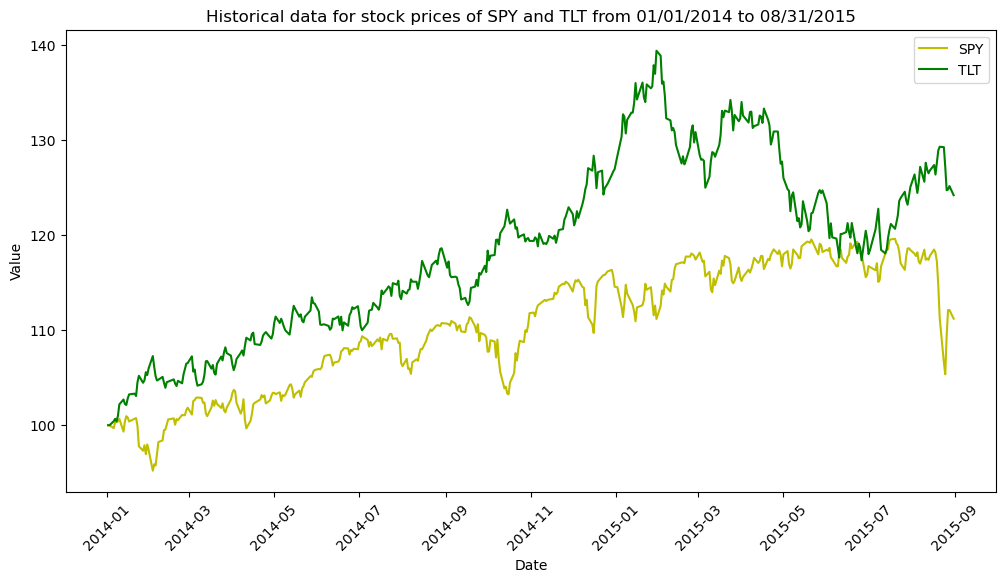

In [8]:
plt.figure(figsize=(12,6))
plt.title("Historical data for stock prices of SPY and TLT from 01/01/2014 to 08/31/2015")
plt.xlabel("Date")
plt.ylabel("Value")
plt.plot(spy_normalized_close_df, label='SPY', color="y")
plt.plot(tlt_normalized_close_df, label='TLT', color="g")
plt.xticks(rotation = 45)
plt.legend(loc=0)
plt.show()

10. For the ETFs on the previous question, calculate daily returns, r(t) = p(t)/p(t-1)-1, for each trading day in the same time period as above. Calculate the average, min and max daily return for each of the two ETFs during the time period and express these as percentages.

In [ ]:
spy_close_df['Daily Return'] = (spy_close_df['Adj Close'] / spy_close_df['Adj Close'].shift(1)) - 1
tlt_close_df['Daily Return'] = (tlt_close_df['Adj Close'] / tlt_close_df['Adj Close'].shift(1)) - 1

In [ ]:
print("SPY Minimum daily return: "+ "%.2f%%" % (spy_close_df['Daily Return'].min()*100))
print("SPY Maximum daily return: "+ "%.2f%%" % (spy_close_df['Daily Return'].max()*100))
print("SPY Average daily return: "+ "%.2f%%" % (spy_close_df['Daily Return'].mean()*100))

print("TLT Minimum daily return: "+ "%.2f%%" % (tlt_close_df['Daily Return'].min()*100))
print("TLT Maximum daily return: "+ "%.2f%%" % (tlt_close_df['Daily Return'].max()*100))
print("TLT Average daily return: "+ "%.2f%%" % (tlt_close_df['Daily Return'].mean()*100))